In [3]:
housing <- read.table("http://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

colnames(housing) <- c("CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
                       "DIS", "RAD", "TAX", "PRATIO", "B", "LSTAT", "MDEV")
summary(housing)

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

In [4]:
housing <- housing[order(housing$MDEV),]

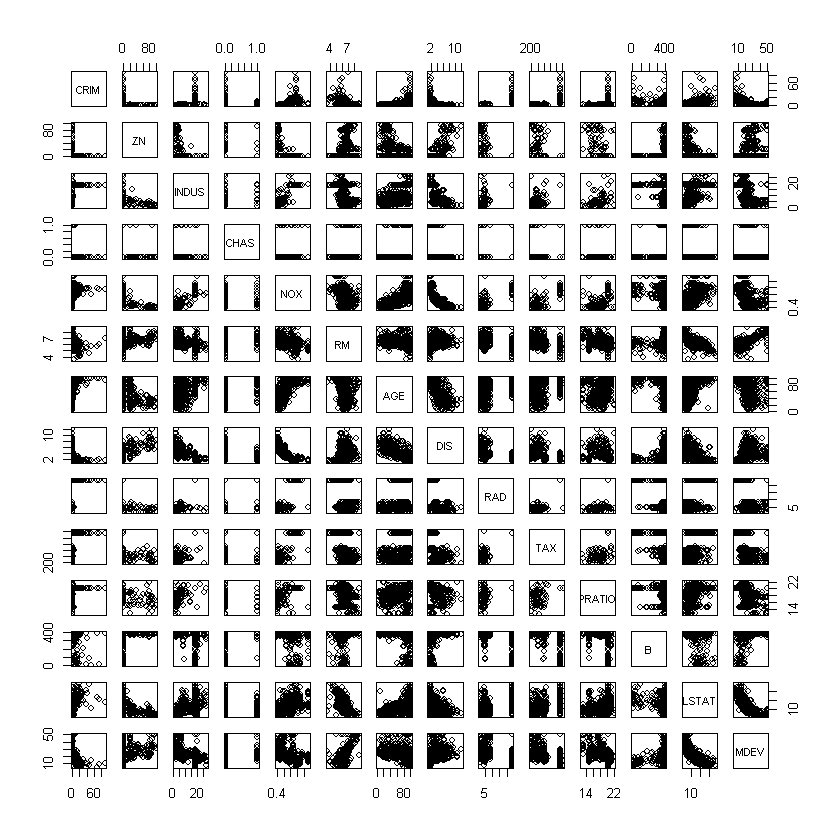

In [5]:
plot(housing)

In [6]:
set.seed(133)

In [8]:
library(caret)
trainingIndices <- createDataPartition(housing$MDEV, p=0.75, list=FALSE)
housingTraining <- housing[trainingIndices,]
housingTesting <- housing[-trainingIndices,]
nrow(housingTraining)
nrow(housingTesting)

[1] 381

[1] 125

In [11]:
linearModel <- lm(MDEV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE +
                 DIS + RAD + TAX + PRATIO + B + LSTAT, data=housingTraining)
summary(linearModel)


Call:
lm(formula = MDEV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + 
    DIS + RAD + TAX + PRATIO + B + LSTAT, data = housingTraining)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.7323  -2.7572  -0.5797   1.7875  23.5646 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  44.686963   6.089142   7.339 1.40e-12 ***
CRIM         -0.126038   0.038701  -3.257  0.00123 ** 
ZN            0.047673   0.016806   2.837  0.00481 ** 
INDUS        -0.026265   0.075653  -0.347  0.72865    
CHAS          2.416668   1.005176   2.404  0.01670 *  
NOX         -20.209516   4.482284  -4.509 8.78e-06 ***
RM            2.959184   0.478324   6.187 1.64e-09 ***
AGE           0.007147   0.015575   0.459  0.64657    
DIS          -1.799416   0.240225  -7.491 5.16e-13 ***
RAD           0.342877   0.078881   4.347 1.79e-05 ***
TAX          -0.012117   0.004607  -2.630  0.00889 ** 
PRATIO       -0.889728   0.155912  -5.707 2.38e-08 ***
B             0.008680   0.0

In [12]:
predicted <- predict(linearModel, newdata=housingTesting)
summary(predicted)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -5.68   16.87   21.47   22.31   27.93   43.50 

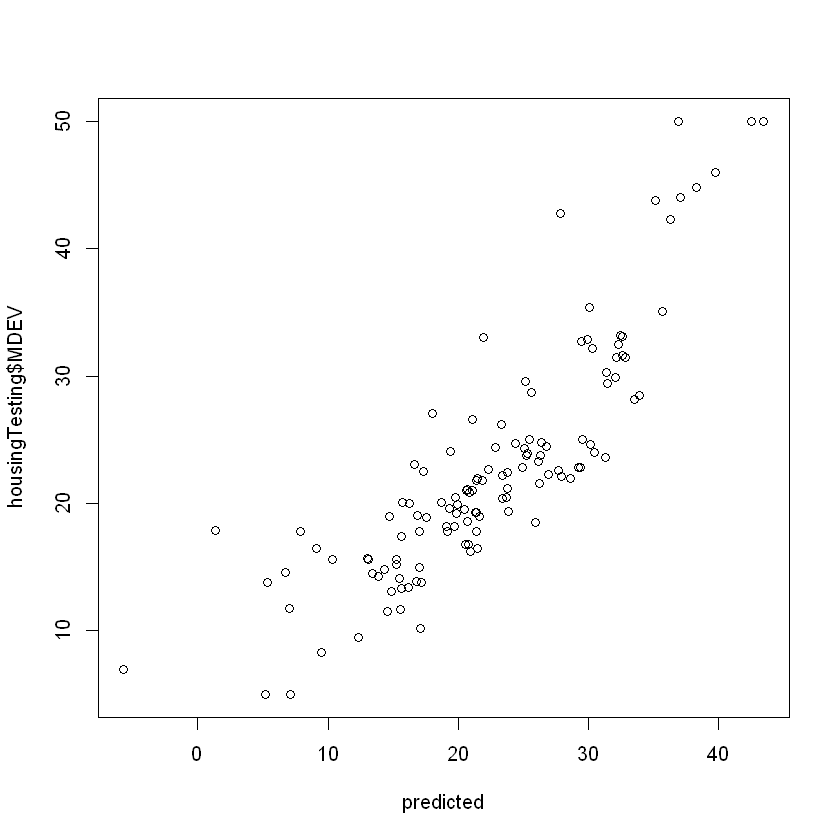

In [14]:
 plot(predicted, housingTesting$MDEV)